# Применяем нейронную сеть для распознавания изображений моделей одежды

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование нейросетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [2]:
from tensorflow.keras.models import load_model
#from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

## Загружаем предварительно обученную нейронную сеть

Закачиваем файл с обученной моделью

In [4]:
#!wget https://github.com/sozykin/dlpython_course/raw/master/introduction/fashion_mnist_dense.h5 -O fashion_mnist_dense.h5

Загружаем модель в память

In [5]:
model = load_model('fashion_mnist_dense.h5')

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


## Загружаем в Colab изображение для распознавания

In [9]:
#f = files.upload()

In [10]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
img_path = 'bag.jpg'

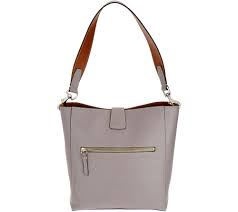

In [14]:
Image(img_path, width=200, height=200)

## Распознаем изображение

Загружаем изображение из файла с помощью инструментов Keras

In [15]:
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Предварительная обработка изображения

In [16]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [17]:
prediction = model.predict(x)

Результаты распознавания

In [18]:
prediction

array([[1.0048669e-09, 1.2857191e-18, 4.3934167e-09, 4.0759828e-06,
        1.1158753e-09, 6.8091127e-12, 4.2181911e-09, 2.5657373e-10,
        9.9999595e-01, 1.8443703e-20]], dtype=float32)

In [19]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 8
Название класса: сумка
